# Telecom Chrun Case Study 

# # Problem Statement



#### Step 1 : Reading and understanding the data

In [118]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')
# this is to see more columns during analysis  
pd.options.display.max_columns = None
# this is to see more rows during analysis 
pd.options.display.max_rows = None


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [119]:
df = pd.read_csv('/kaggle/input/telecom-churn-case-study-hackathon-c42/train.csv')
df.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


This will automatically assign date columns solution from "https://stackoverflow.com/questions/33204500/pandas-automatically-detect-date-columns-at-run-time"

In [121]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col])
        except ValueError:
            pass

In [122]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    id                        int64         
 1    circle_id                 int64         
 2    loc_og_t2o_mou            float64       
 3    std_og_t2o_mou            float64       
 4    loc_ic_t2o_mou            float64       
 5    last_date_of_month_6      datetime64[ns]
 6    last_date_of_month_7      datetime64[ns]
 7    last_date_of_month_8      datetime64[ns]
 8    arpu_6                    float64       
 9    arpu_7                    float64       
 10   arpu_8                    float64       
 11   onnet_mou_6               float64       
 12   onnet_mou_7               float64       
 13   onnet_mou_8               float64       
 14   offnet_mou_6              float64       
 15   offnet_mou_7              float64       
 16   offnet_mou_8              float64     

In [123]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [124]:
df.shape

(69999, 172)

#### Step 2 : Data Cleaning

In [125]:

#Understand the exact percentage of data missing from the list 

df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_mou_6             3.954342
loc_og_t2m_mou_7             3.838626
loc_og_t2m_mou_8             5.290076
loc_og_t2f_mou_6             3.954342
loc_og_t2f_mou_7             3.838626
loc_og_t2f_mou_8             5.290076
loc_og_t2c_m

In [126]:
data_desc = pd.read_csv('/kaggle/input/telecom-churn-case-study-hackathon-c42/data_dictionary.csv')
data_desc

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


### Data Breakdown

From looking at the Description and checking the data, we can safely assume that Rech columns where there are missing values are due to customer not recharging in those months so it will be safe to impute 0 in there. 


### Imputing 0 in for recharge missing values


- total_rech_data_6           
- total_rech_data_7          
- total_rech_data_8           
- max_rech_data_6             
- max_rech_data_7             
- max_rech_data_8             
- count_rech_2g_6             
- count_rech_2g_7             
- count_rech_2g_8             
- count_rech_3g_6             
- count_rech_3g_7            
- count_rech_3g_8             
- av_rech_amt_data_6          
- av_rech_amt_data_7          
- av_rech_amt_data_8          


- count_rech_3g_6   =           74.902499
- count_rech_3g_7   =            74.478207
- count_rech_3g_8   =          73.689624

----------------------------------------------------
These columns are missing more than 70% and not recharge columns so these will need to removed
- arpu_3g_6        =           74.902499
- arpu_3g_7        =           74.478207
- arpu_3g_8        =           73.689624
- arpu_2g_6        =           74.902499
- arpu_2g_7        =           74.478207
- arpu_2g_8        =           73.689624

----------------------------------------------------

As they all relate to recharge, we can assume recharge and other columns got relationship. Although in rest of the columns there are some categorical variables as well so they need to imputed differently

- night_pck_user_6       =     74.902499
- night_pck_user_7       =     74.478207
- night_pck_user_8       =     73.689624
- fb_user_6              =     74.902499
- fb_user_7              =     74.478207
- fb_user_8              =     73.689624

These will be imputed with -1 instead of 0, since 0 and 1 holds a meaning there.

In [127]:
recharge = ['total_rech_data_6','total_rech_data_7','total_rech_data_8',
           'max_rech_data_6','max_rech_data_7','max_rech_data_8',
           'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
           'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
           'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']

df[recharge] = df[recharge].apply(lambda x: x.fillna(0))

relat_rech = ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
           'fb_user_6','fb_user_7','fb_user_8']

df[relat_rech] = df[relat_rech].apply(lambda x: x.fillna(-1))

In [128]:
df = df.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'], axis =1)

In [129]:
list(df.select_dtypes(['datetime64[ns]']).columns)

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

Date columns will be droped as they hold no value on the churn decision making skills these columns will be dropped

In [130]:
date_col = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
           'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
           'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
df = df.drop(date_col, axis =1)

Next we can also drop ID and Circle ID values since they do not hold useful relationships.

In [131]:
df = df.drop(['id','circle_id'], axis =1)

Next will be to look at the following list of missing data that are similar based on KPI month

2 sets shown below for example 
- onnet_mou_6   =      3.954342
- onnet_mou_7   =      3.838626
- onnet_mou_8   =      5.290076
- offnet_mou_6  =      3.954342
- offnet_mou_7  =      3.838626
- offnet_mou_8  =      5.290076

and as can be seen above they are all related to calls and when looked closely it can seen that most of the poeple with missing column values are related to churned people so they need to be imputed with 0, they cant be ignored as the data suggests they they are people who are churning. 

In [132]:
df = df.fillna(0)

In [133]:
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

Series([], dtype: float64)

In [134]:
df.shape

(69999, 155)

### Filter out High Value Customers

In [135]:
df['total_d_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_d_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']
df['total_d_8'] = df['total_rech_data_8'] * df['av_rech_amt_data_8']

In [136]:
df['total_recharge_6'] = df['total_d_6'] + df['total_rech_amt_6']
df['total_recharge_7'] = df['total_d_7'] + df['total_rech_amt_7']
df['total_recharge_8'] = df['total_d_8'] + df['total_rech_amt_8']

In [137]:
# now find the average of the three months
df['avergae_rec_6_7_8'] = (df['total_recharge_6']+df['total_recharge_7'] + df['total_recharge_8'])/3

In [138]:
#70 percentile of the recharge amount is calculated
df['avergae_rec_6_7_8'].quantile(0.7)

484.3333333333333

To filter out the high end customers the data will be cut at 70 percetile amount stated above

In [139]:
df_cut = df.loc[df['avergae_rec_6_7_8'] >= df['avergae_rec_6_7_8'].quantile(0.7), :]
df_cut = df_cut.reset_index(drop=True)



In [140]:
df_cut.shape

(21001, 162)

In [141]:
#Derive a New Variable

df_cut['months_network'] = (df_cut['aon'])//30
#Drop the columns since we already have months from the date
df.drop('aon', axis=1, inplace = True)


### Step 3  : Data Visualisation and EDA

 Before we figure out the which are high hitting customers (where the risk lies), lets observe the data and figure out the trend.

<AxesSubplot:ylabel='None'>

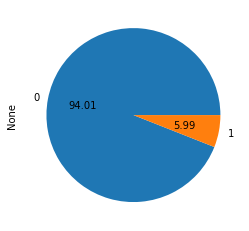

In [142]:
# first thing is to understand the churned customer vs non churned customer ratio.
#color pallette to use 

df_cut.groupby('churn_probability').size().plot(kind='pie', autopct='%.2f')

From the above pie plot its shown that 6.33% of customers have churned, compared to non churned data can see be seen as imbalanced.


Lets check out what the categorical information stated above shows in the data in relationship to churn.

In [143]:
from matplotlib.ticker import PercentFormatter

def bivar_plotting(base,xlabelTitle,ylabelTitle,chartTitle):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
    for ax, multiple in zip((ax1, ax2), ['layer', 'fill']):
        sns.histplot(data=df_cut, x=base, hue='churn_probability',hue_order= [1,0], binwidth=10, stat='percent', multiple=multiple, ax=ax)
        ax.set_title(f"multiple='{multiple}'")

    for bar_group, color in zip(ax.containers, ['black', 'white']):
        ax.bar_label(bar_group, label_type='center', color=color,
        labels=[f'{bar.get_height() * 100:.1f} %' if bar.get_height() > 0 else '' for bar in bar_group])
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax1.set_title(chartTitle,size=24)
    ax1.set_ylabel(ylabelTitle, fontsize = 16) 
    ax1.set_xlabel(xlabelTitle, fontsize = 16) 
    ax2.set_title(chartTitle,size=24)
    ax2.set_ylabel(ylabelTitle, fontsize = 16) 
    ax2.set_xlabel(xlabelTitle, fontsize = 16) 
    plt.tight_layout()
    plt.show()

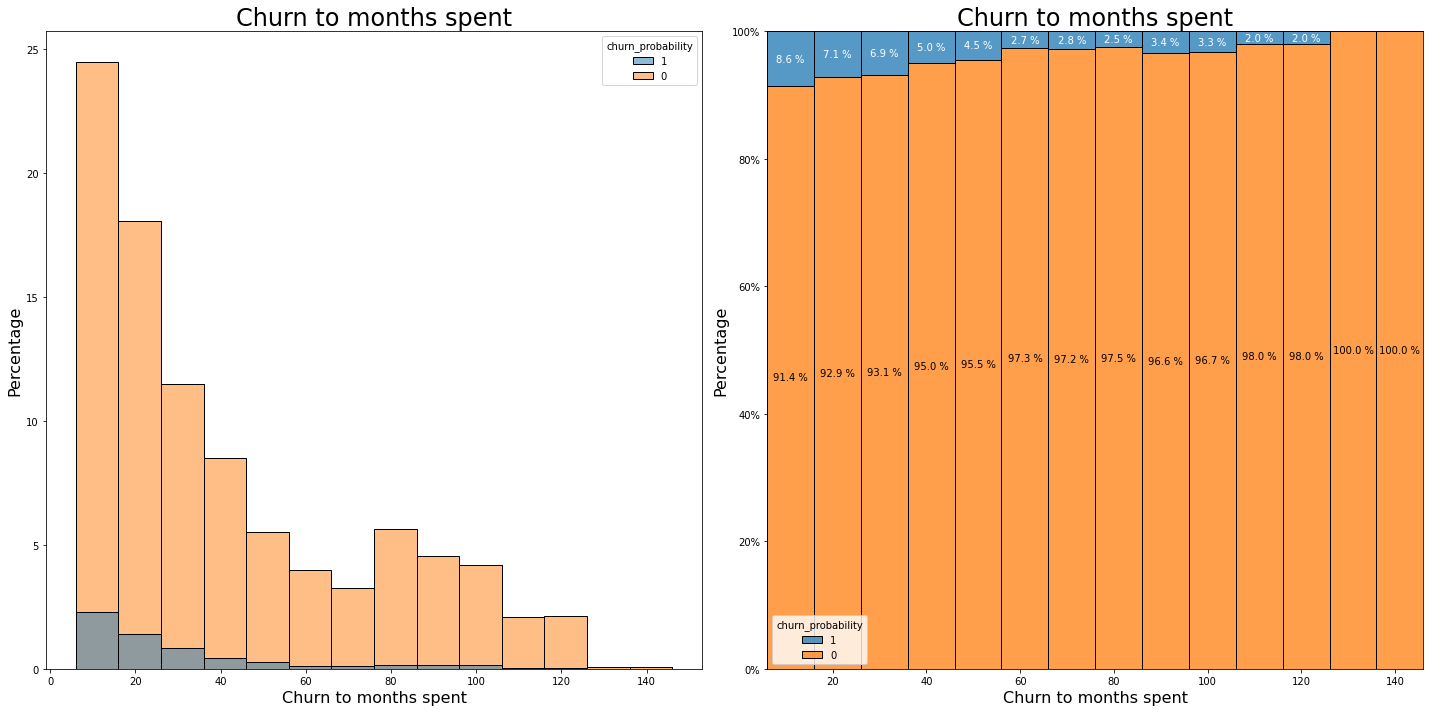

In [144]:
bivar_plotting('months_network','Churn to months spent', 'Percentage', 'Churn to months spent')

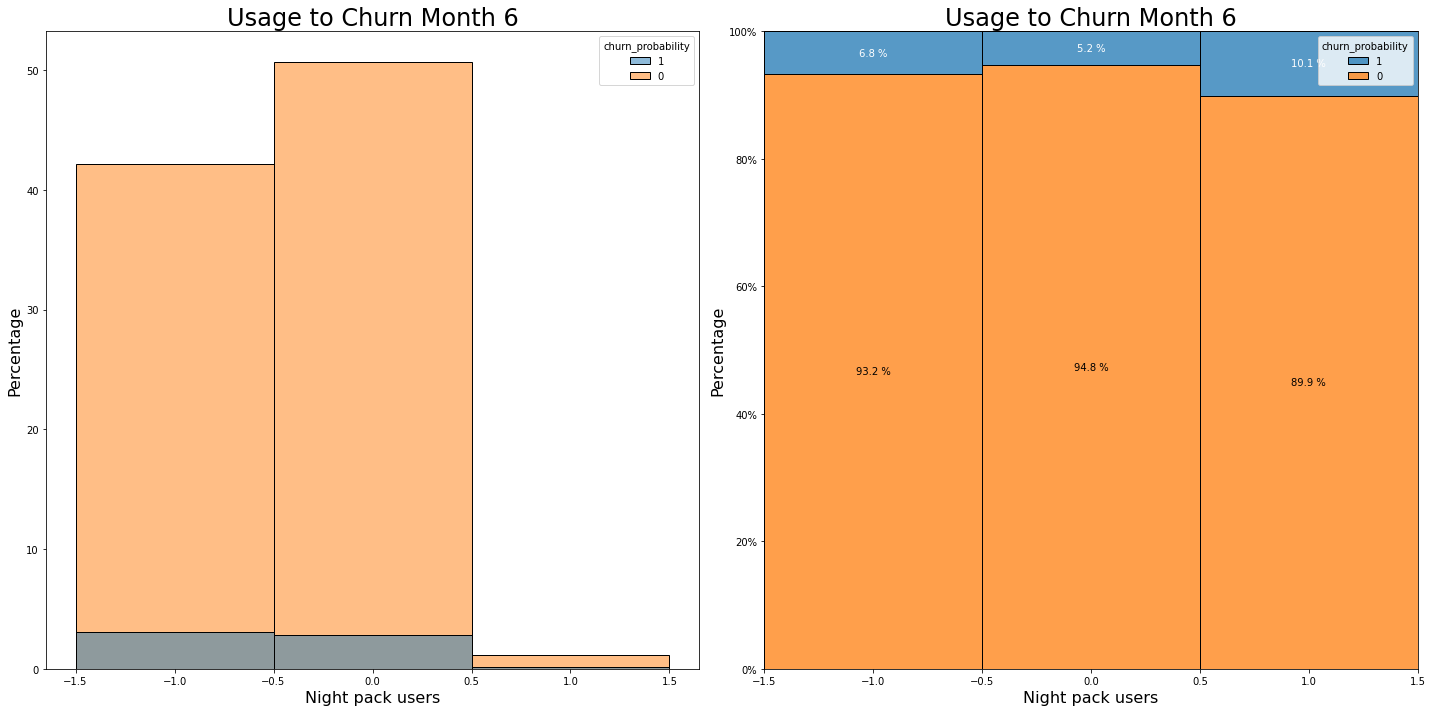

In [145]:
df_cut['night_pck_user_6'] = df_cut.night_pck_user_6.astype('category')
bivar_plotting('night_pck_user_6','Night pack users', 'Percentage', 'Usage to Churn Month 6')

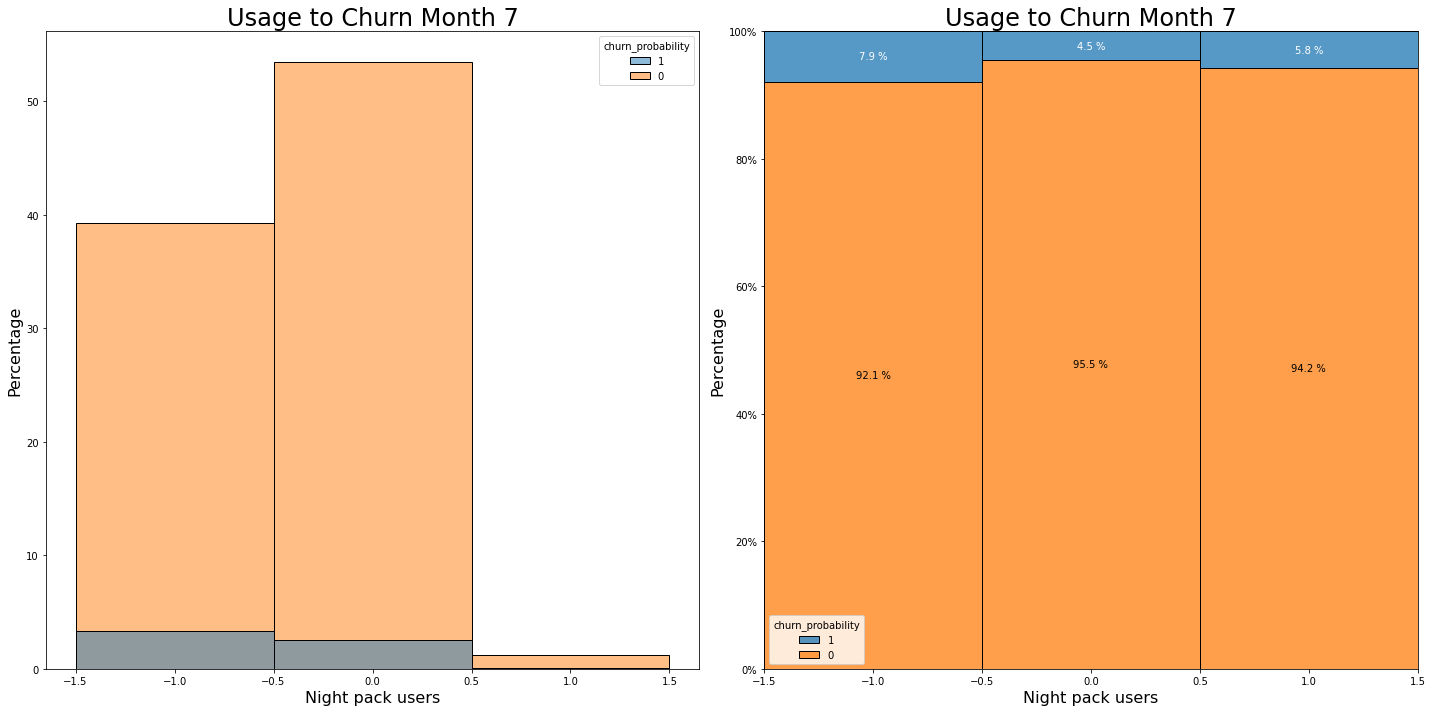

In [146]:
df_cut['night_pck_user_7'] = df_cut.night_pck_user_7.astype('category')
bivar_plotting('night_pck_user_7','Night pack users', 'Percentage', 'Usage to Churn Month 7')

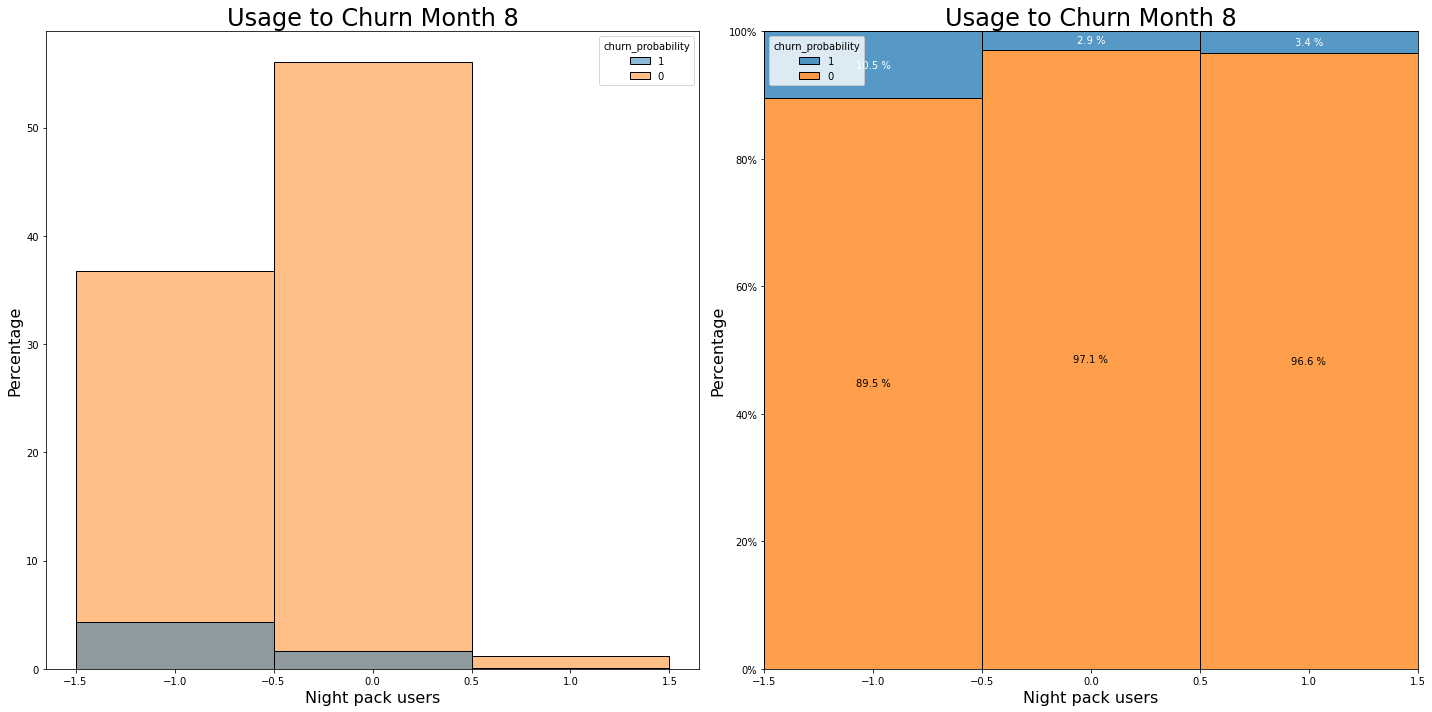

In [147]:
df_cut['night_pck_user_8'] = df_cut.night_pck_user_8.astype('category')
bivar_plotting('night_pck_user_8','Night pack users', 'Percentage', 'Usage to Churn Month 8')

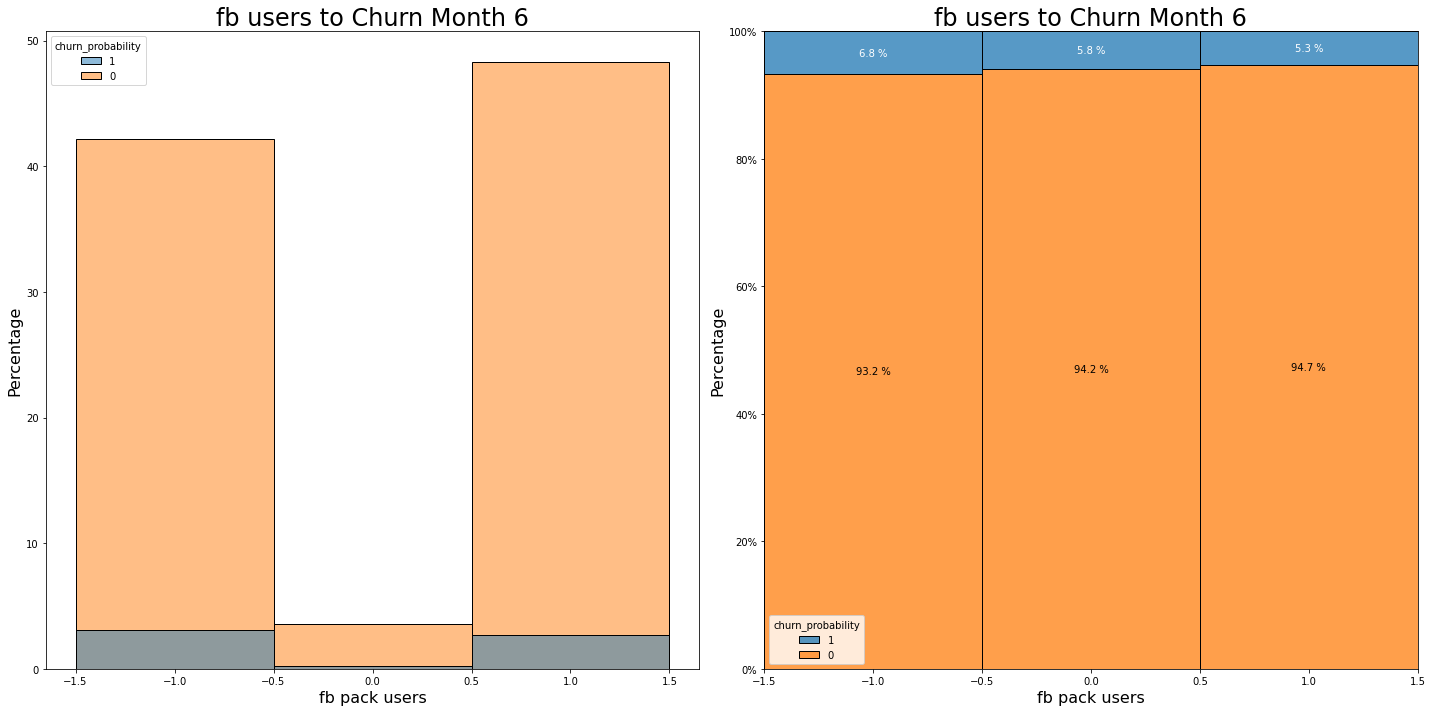

In [148]:
df_cut['fb_user_6'] = df_cut.fb_user_6.astype('category')
bivar_plotting('fb_user_6','fb pack users', 'Percentage', 'fb users to Churn Month 6')

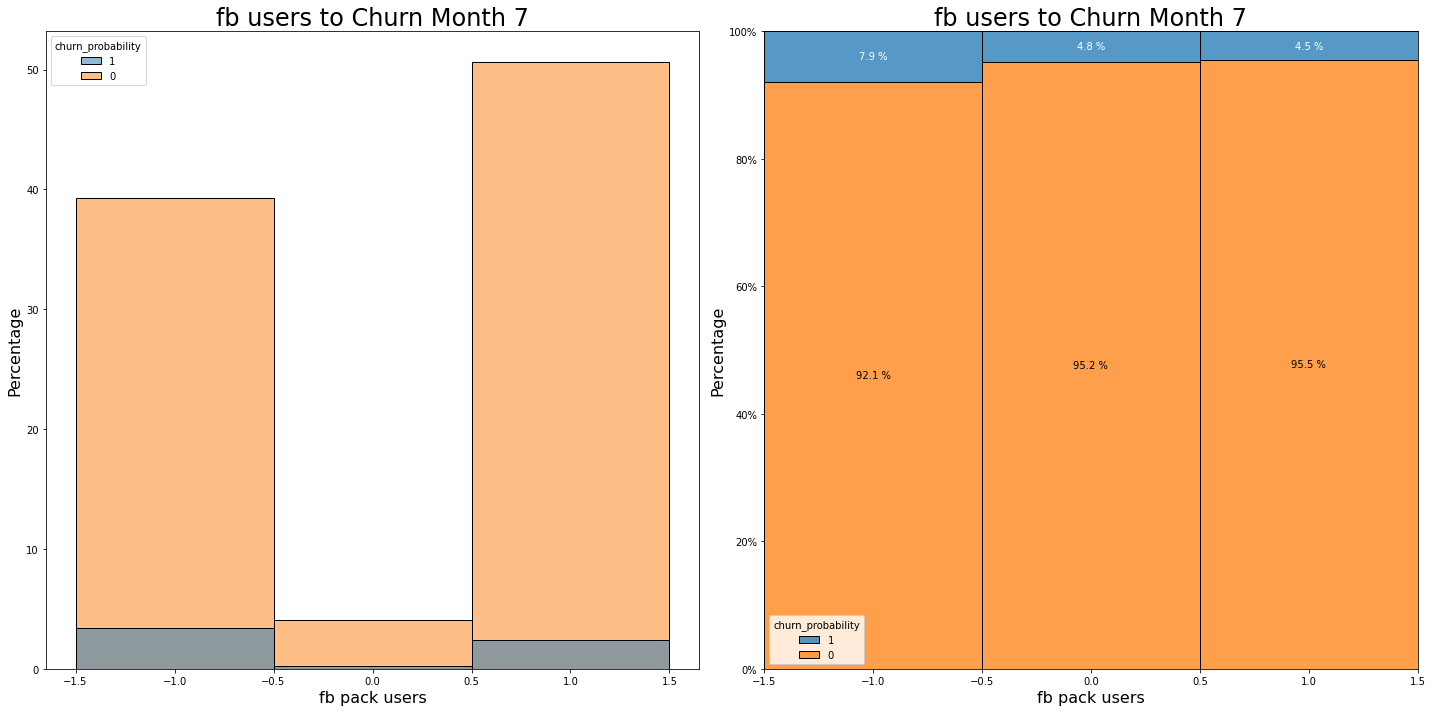

In [149]:
df_cut['fb_user_7'] = df_cut.fb_user_7.astype('category')
bivar_plotting('fb_user_7','fb pack users', 'Percentage', 'fb users to Churn Month 7')

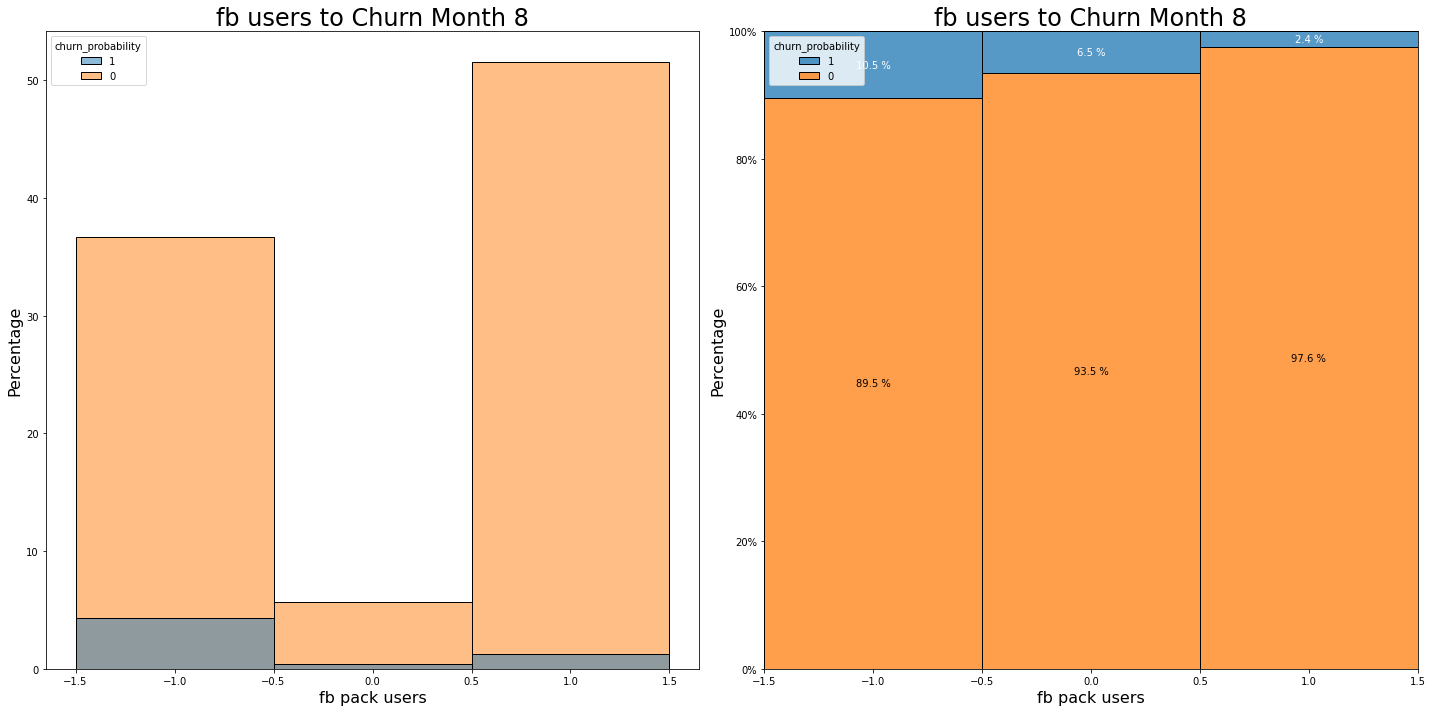

In [150]:
df_cut['fb_user_8'] = df_cut.fb_user_8.astype('category')
bivar_plotting('fb_user_8','fb pack users', 'Percentage', 'fb users to Churn Month 8')

It can be seen that customers with missing data which is got imputted with -1 earlier, they seems to be highest churned according to the data, if they are on night pack or fb pack does not hold much difference that is obvious.


Also it can be seen that as people spent more months with the provider the churn rate reduces.


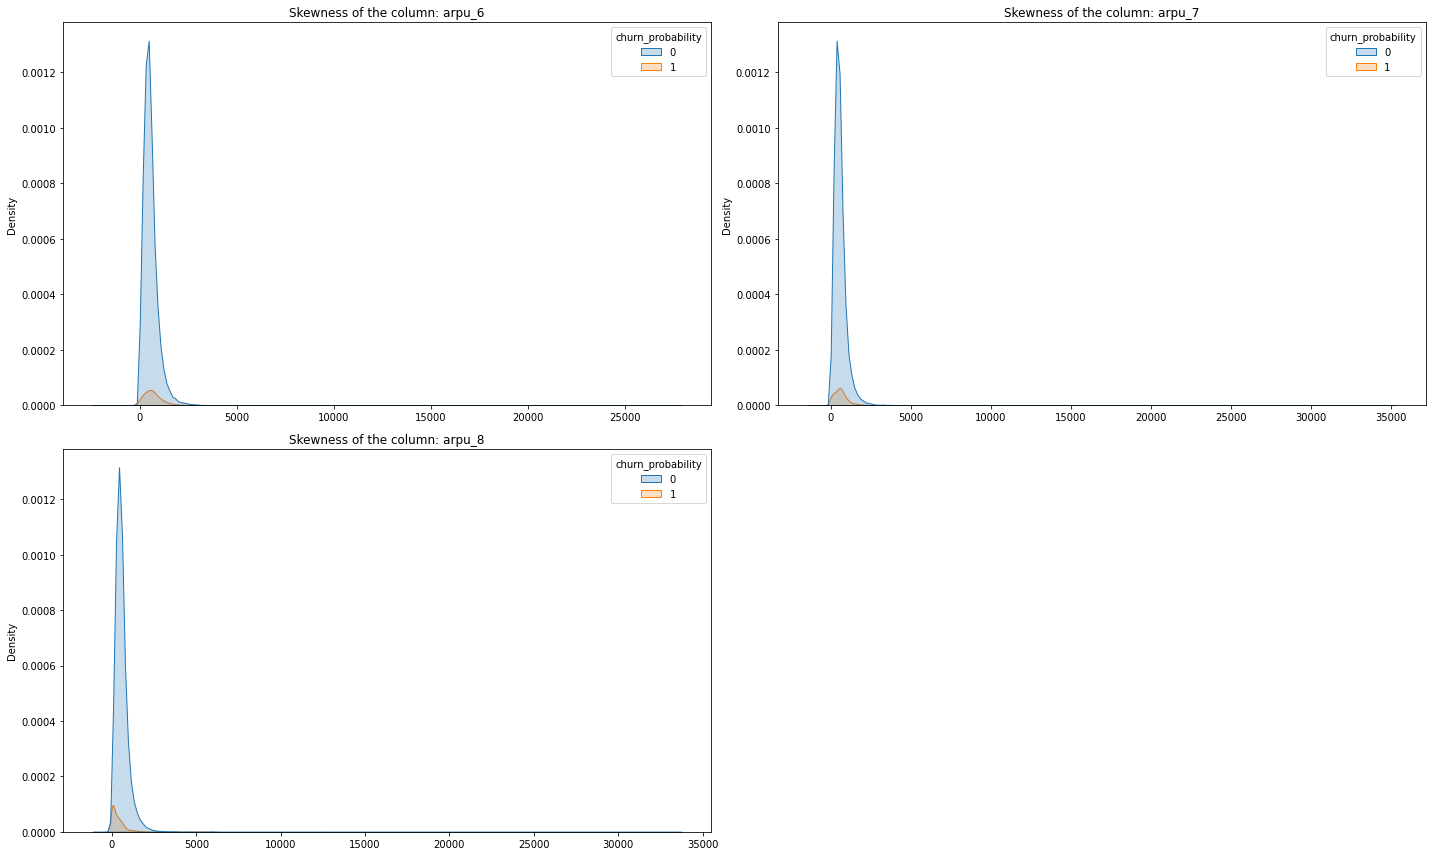

In [151]:
# need to create additional column which will be the sum of months and average
# derived from https://stackoverflow.com/questions/69067250/plotting-multiple-seaborn-displot 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = ['arpu_6','arpu_7','arpu_8']

for col, ax in zip(cols, axes):
    data = df_cut[[col, 'churn_probability']]  # select the data
    sns.kdeplot(data=data, x=col, hue='churn_probability', shade=True, ax=ax)
    ax.set(title=f'Skewness of the column: {col}', xlabel=None)
    
fig.delaxes(axes[3])  # delete the empty subplot
fig.tight_layout()
plt.show()

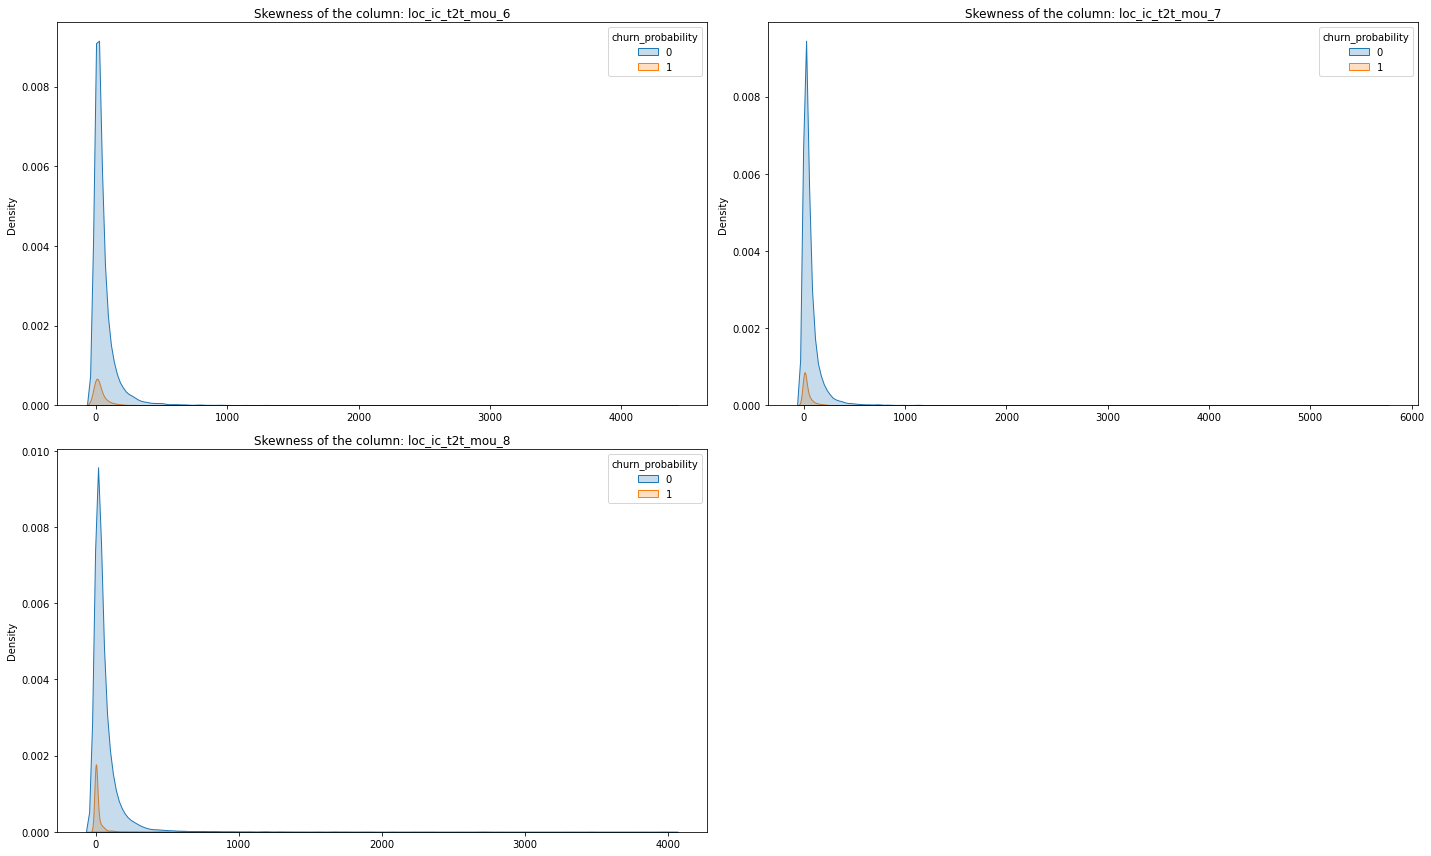

In [152]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = ['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8']

for col, ax in zip(cols, axes):
    data = df_cut[[col, 'churn_probability']]  # select the data
    sns.kdeplot(data=data, x=col, hue='churn_probability', shade=True, ax=ax)
    ax.set(title=f'Skewness of the column: {col}', xlabel=None)
    
fig.delaxes(axes[3])  # delete the empty subplot
fig.tight_layout()
plt.show()

From Observing few of the numerical data it can be seen that data is heavly skewed to the left. 


Next thing to check is the outliers in the dataset. 

In [153]:
def creating_box_hist(column, column2,column3):
    df_cut['churn_probability'] = df_cut.churn_probability.astype('category')
    
    plt.figure(figsize=(30,20))  
    plt.subplot(221)
    sns.boxplot(data=df_cut, x=column, y=column2)
    plt.subplot(222)
    sns.boxplot(data=df_cut, x=column3, y=column2)
    plt.subplot(223)
    sns.boxplot(data=df_cut, x=column, y=column2)
    plt.subplot(224)
    sns.boxplot(data=df_cut, x=column3, y=column2)
    
    plt.show()
    
    

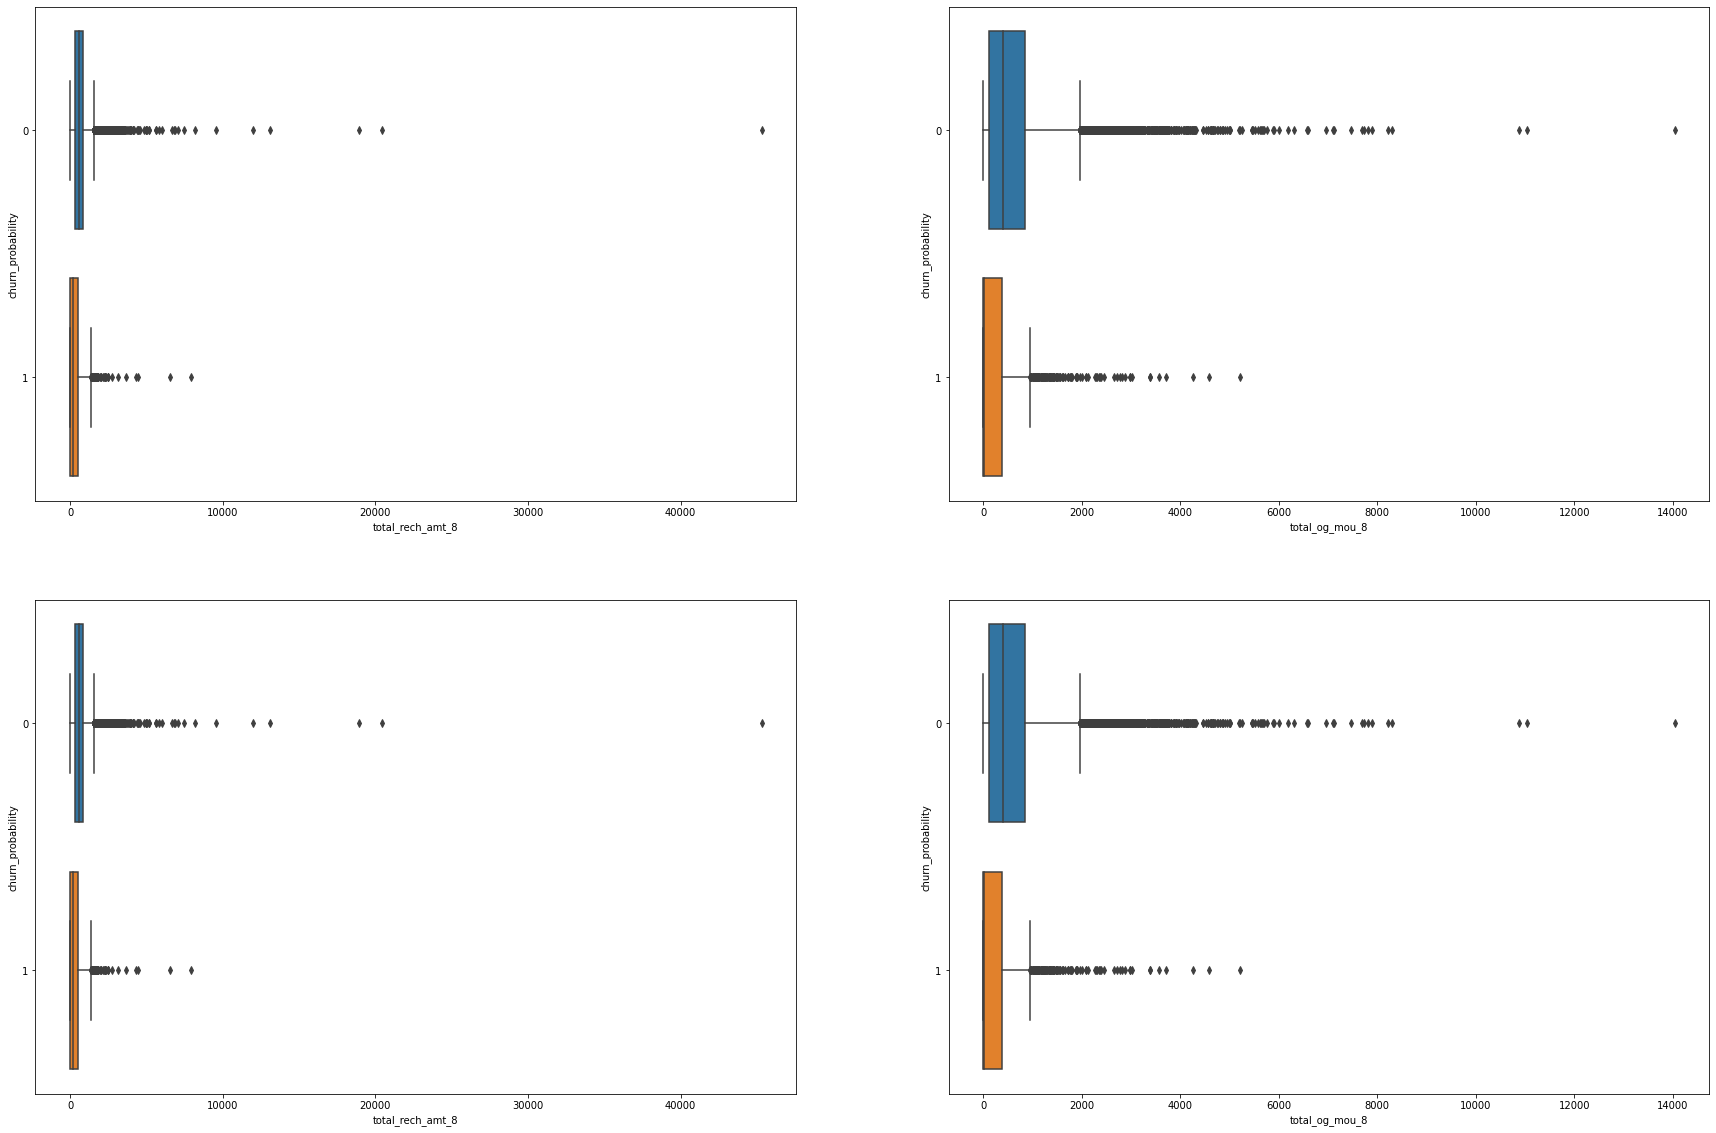

In [154]:
creating_box_hist('total_rech_amt_8','churn_probability','total_og_mou_8' )

In [155]:
# Resetting previously set categorical variables back into numerical format.
df_cut[['night_pck_user_6', 'night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','churn_probability']] = df_cut[['night_pck_user_6', 'night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','churn_probability']].apply(pd.to_numeric)

In [156]:
df_cut.head(5)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_d_6,total_d_7,total_d_8,total_recharge_6,total_recharge_7,total_recharge_8,avergae_rec_6_7_8,months_network
0,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,13,10,8,290,136,122,50,41,30,25,10,30,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0,1225.0,1337.0,852.0,1515.0,1473.0,974.0,1320.666667,21
1,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,1.0,0.0,1.0,154.0,0.0,154.0,1.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,154.0,260.42,0.00,354.35,0.0,0.00,0.00,0.0,-1.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,-1.0,1.0,602,0.0,0.00,0.00,0,154.0,0.0,154.0,808.0,400.0,806.0,671.333333,20
2,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,3

In [157]:
churn = (sum(df_cut['churn_probability'])/len(df_cut['churn_probability'].index))*100
churn

5.9854292652730825

Churn rate is low at it is only at 6.33% for the high end customers 

In [158]:
# lets drop columns which got high correlation between each other 

def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df_cut, .6)

std_og_mou_6        offnet_mou_6          0.600060
total_recharge_6    count_rech_3g_6       0.600149
monthly_3g_8        max_rech_data_8       0.600912
av_rech_amt_data_7  fb_user_7             0.601519
max_rech_data_6     monthly_3g_6          0.602534
night_pck_user_8    night_pck_user_7      0.602685
total_rech_data_8   count_rech_2g_7       0.603008
arpu_8              arpu_6                0.603791
av_rech_amt_data_8  total_d_8             0.603944
std_ic_t2m_mou_7    std_ic_mou_6          0.604609
total_rech_data_8   sachet_2g_7           0.605008
av_rech_amt_data_7  av_rech_amt_data_8    0.605382
loc_ic_t2t_mou_7    total_ic_mou_7        0.605469
vol_3g_mb_8         aug_vbc_3g            0.605602
std_og_t2t_mou_8    std_og_mou_7          0.605847
loc_ic_t2t_mou_8    total_ic_mou_8        0.606693
std_og_t2t_mou_6    std_og_t2t_mou_8      0.607713
av_rech_amt_data_6  fb_user_6             0.608683
av_rech_amt_data_8  fb_user_8             0.609706
offnet_mou_6        std_og_t2m_

In [159]:
# some of the columns higher than 90% correlation will be dropped

df_cut = df_cut.drop(['sachet_2g_8', 'sachet_2g_7','sachet_2g_6','night_pck_user_6','night_pck_user_7',
              'arpu_8','arpu_7','isd_og_mou_8','arpu_6','night_pck_user_8',
              'total_d_8','isd_og_mou_6','total_d_7',
              'isd_og_mou_6','total_d_6','count_rech_2g_7',
              'count_rech_2g_6','sachet_2g_7','count_rech_2g_8','sachet_2g_6'],axis=1)

### Step 4  : Modelling

In [160]:
#inserting features in to X and response variable y
X = df_cut.drop(['churn_probability'], axis=1)
y = df_cut['churn_probability']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [161]:
#split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14700, 145)
(6301, 145)
(14700,)
(6301,)


In [162]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Handling of Data imbalance 

As seen previously data is heavly imbalanced one of the approach available to migigate this is SMOT (Synthetic minority oversampling technique), as susggested by the name this oversamples the minority class by duplicating examples from minority class. 

In [163]:
# this can be easily seen below
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({0: 13853, 1: 847})


In [164]:
sm = SMOTE(random_state=42)
X_train_re, y_train_re = sm.fit_resample(X_train, y_train)


In [165]:
counter = Counter(y_train_re)
print(counter)

Counter({1: 13853, 0: 13853})


Now since we sorted out imbanalce using SMOTE, we can use PCA for dimensionality reduction

#### PCA

In [166]:
#PCA setting
pc = PCA()
pca = Pipeline(steps=[("pca", pc)])



In [167]:
pca.fit(X_train_re)

Pipeline(steps=[('pca', PCA())])

In [168]:
pc.components_

array([[-6.43585133e-19,  2.22044605e-16, -0.00000000e+00, ...,
         4.64117111e-03,  1.06008559e-02,  3.06936614e-03],
       [-2.75891443e-20, -1.00613962e-16, -1.45716772e-16, ...,
         1.05364367e-02,  2.66640191e-03,  1.40177071e-01],
       [-6.98205467e-19,  1.66533454e-16,  0.00000000e+00, ...,
        -7.56064951e-04, -3.20217380e-03,  6.48831294e-01],
       ...,
       [-0.00000000e+00,  4.10536947e-02, -1.22909435e-02, ...,
        -4.34193408e-05,  5.40642329e-05,  1.16226473e-16],
       [ 9.99999765e-01, -6.94083927e-05, -6.94273573e-05, ...,
         4.27184174e-06, -5.31914677e-06, -9.78153647e-17],
       [ 0.00000000e+00, -6.95931579e-01, -6.94780545e-01, ...,
         2.26534856e-02, -2.82073219e-02, -2.77555756e-17]])

In [169]:
#looking at the explained variance ratio of each compoent 
pc.explained_variance_ratio_

array([4.86810779e-01, 1.27893745e-01, 9.00733743e-02, 8.38392155e-02,
       3.73883346e-02, 2.01145507e-02, 1.76923241e-02, 1.59007131e-02,
       1.31697134e-02, 1.07409784e-02, 7.27523539e-03, 6.17387896e-03,
       5.72222579e-03, 4.78158621e-03, 4.32404996e-03, 4.13990315e-03,
       3.92465176e-03, 3.51555066e-03, 2.93603886e-03, 2.79745609e-03,
       2.71516666e-03, 2.63712482e-03, 2.53519509e-03, 2.37945601e-03,
       2.07614495e-03, 2.02599320e-03, 1.85906734e-03, 1.76441829e-03,
       1.66588684e-03, 1.62062479e-03, 1.57193088e-03, 1.45550625e-03,
       1.41053779e-03, 1.18005942e-03, 1.15728263e-03, 1.07865829e-03,
       1.05017036e-03, 9.93942486e-04, 9.23351247e-04, 9.02692460e-04,
       8.51483583e-04, 8.45804372e-04, 8.11553780e-04, 7.30507954e-04,
       7.00115437e-04, 6.26239572e-04, 6.00678723e-04, 5.74917788e-04,
       5.49827139e-04, 5.37725047e-04, 5.01637921e-04, 4.93393694e-04,
       4.61705960e-04, 4.52743413e-04, 4.21967943e-04, 4.15039423e-04,
      

In [170]:
pca = pca.named_steps['pca']

with pd.option_context('display.max_rows', None,):
    print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       48.68
1       61.47
2       70.48
3       78.86
4       82.60
5       84.61
6       86.38
7       87.97
8       89.29
9       90.36
10      91.09
11      91.71
12      92.28
13      92.76
14      93.19
15      93.60
16      94.00
17      94.35
18      94.64
19      94.92
20      95.19
21      95.46
22      95.71
23      95.95
24      96.16
25      96.36
26      96.54
27      96.72
28      96.89
29      97.05
30      97.21
31      97.35
32      97.49
33      97.61
34      97.73
35      97.83
36      97.94
37      98.04
38      98.13
39      98.22
40      98.31
41      98.39
42      98.47
43      98.55
44      98.62
45      98.68
46      98.74
47      98.80
48      98.85
49      98.90
50      98.95
51      99.00
52      99.05
53      99.10
54      99.14
55      99.18
56      99.22
57      99.26
58      99.30
59      99.33
60      99.37
61      99.40
62      99.43
63      99.46
64      99.49
65      99.51
66      99.54
67      99.56
68      99.59
69      99.61
70      99.63
71    

In [171]:
#Making a scree plot on the explained variances

var_cumu = np.cumsum(pca.explained_variance_ratio_)

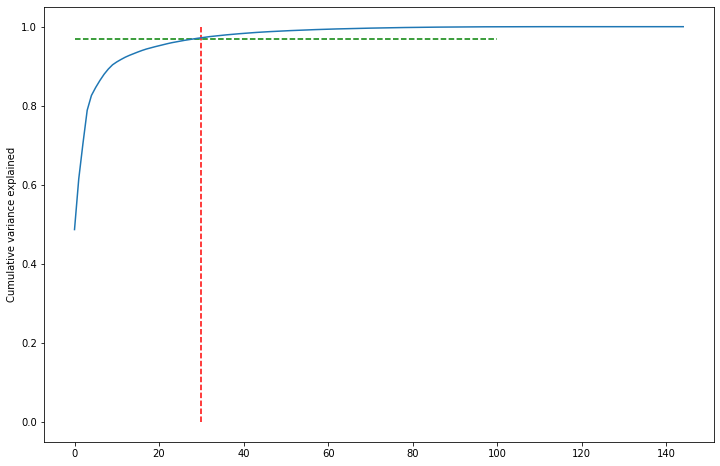

In [172]:
%matplotlib inline
fig = plt.figure(figsize=[12,8])
plt.vlines(x=30, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.97, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Scree plot shows that with 30 features we can safely explain the 97% of the data.

with 50 this goes up to 99%

In [173]:
pca_final = IncrementalPCA(n_components=50)

In [174]:
X_train_pca = pca_final.fit_transform(X_train_re)
X_train_pca.shape

(27706, 50)

In [175]:
#Creating a correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

In [176]:
corrmat.shape

(50, 50)

Plotting heatmap for the correlation matrix

<AxesSubplot:>

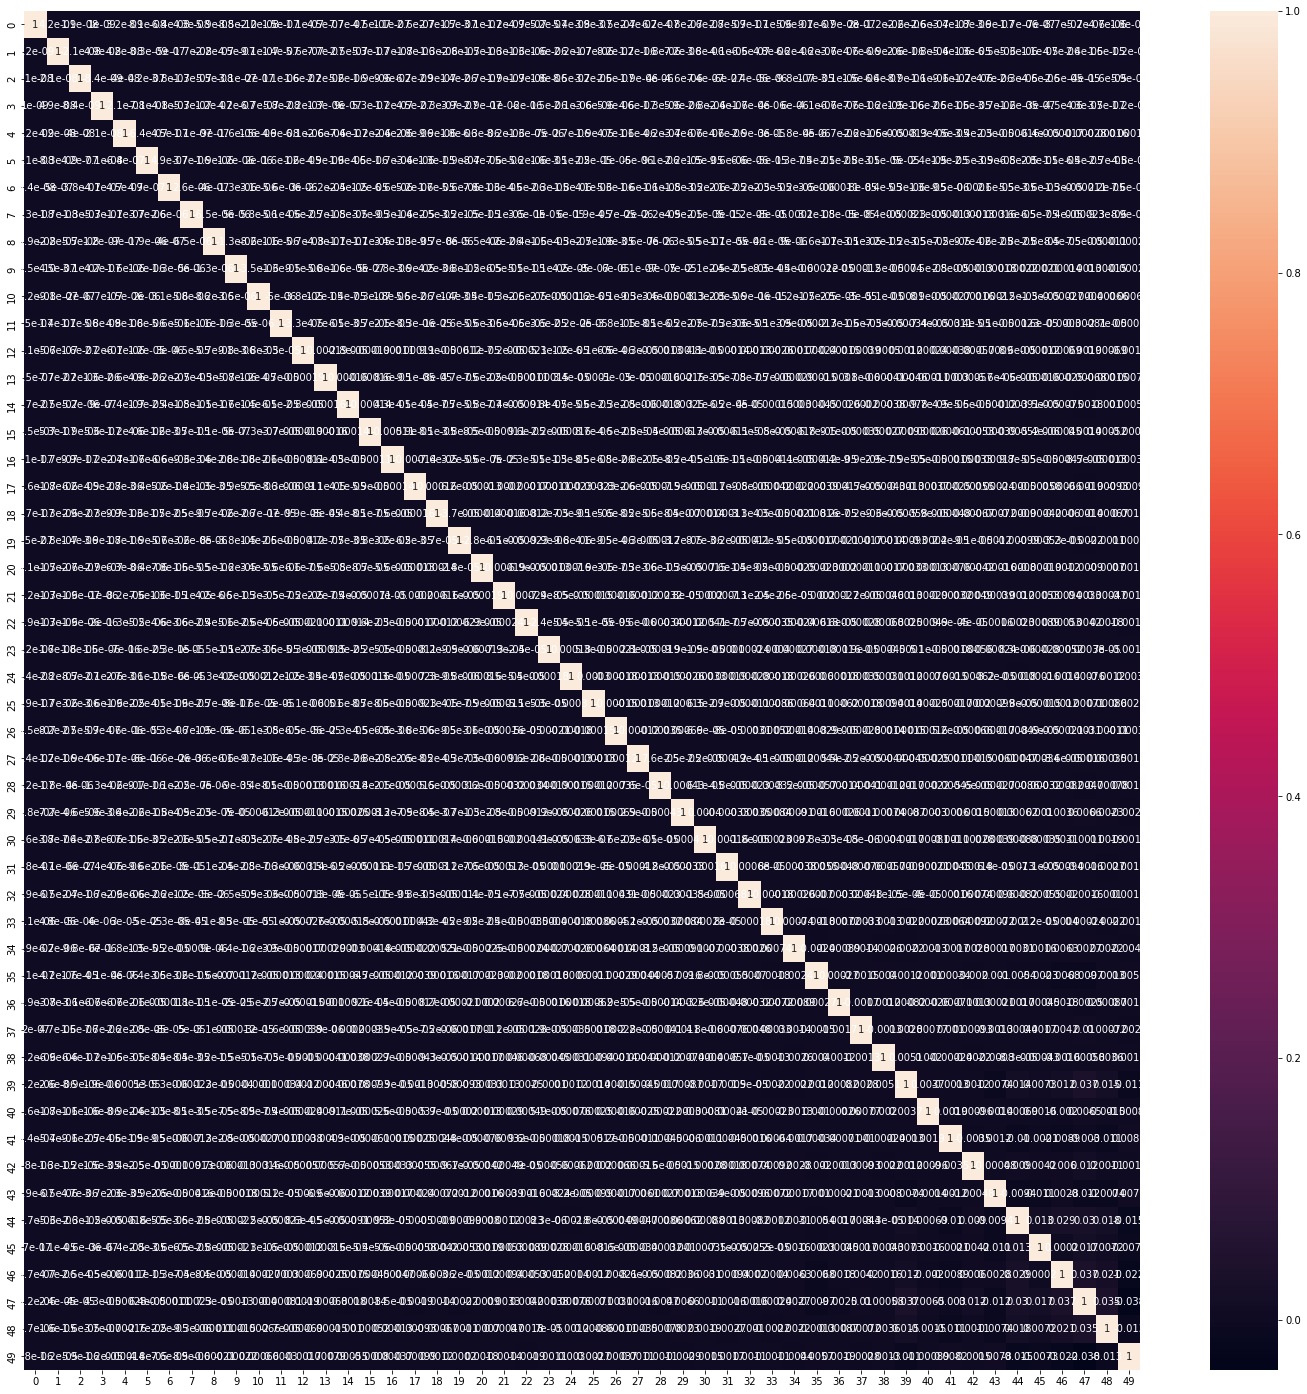

In [177]:
plt.figure(figsize=[25,25])
sns.heatmap(corrmat, annot=True)

In [178]:
# Applying the transformation on the test set
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape


(6301, 50)

Several different models will be used below to assess best predictor for churn (shown below)
1. Logistic Regression
2. Decision Tree
3. Random Forrest 
4. Boosting Model - Gradient Boosting Classifier
5. Boosting Model - XgBoost Classifier
6. SVM

#### 1. Logistic Regression

In [179]:
def logreg(model, X_train, y_train):
    model.fit(X_train, y_train)
        
    predict1 = model.predict(X_train)
    pred_prob_test = model.predict_proba(X_train)[:,1]

    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, predict1))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, predict1))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, pred_prob_test))
    

    
def confusion_read(y_test,y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_test, y_pred))
    print("Sensitivity = ",TP / float(TP+FN))
    print("Specificity = ",TN / float(TN+FP))
    print("False Positive Rate = ",FP/ float(TN+FP))
    print ("Precision = ",TP / float(TP+FP))
    print ("True Negative Prediction Rate = ",TN / float(TN+ FN))
    cm_plot = ConfusionMatrixDisplay(cm).plot()
    cm_plot

In [180]:
df_pca_lr = LogisticRegression()
logreg(df_pca_lr, X_train_pca, y_train_re)


Model Report
Accuracy : 0.8288
Recall/Sensitivity : 0.8478
AUC Score (Train): 0.899142


Accuracy : 0.8008
Sensitivity =  0.7975609756097561
Specificity =  0.8041079612968935
False Positive Rate =  0.19589203870310642
Precision =  0.22079675894665765
True Negative Prediction Rate =  0.9827800829875518


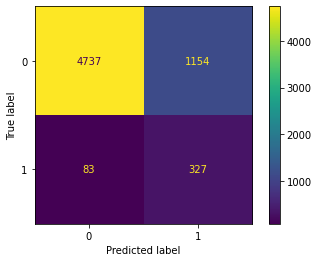

In [181]:
pred_test = df_pca_lr.predict(X_test_pca)
ypred_prob = df_pca_lr.predict_proba(X_test_pca)[::,1]
confusion_read(y_test,pred_test)

 


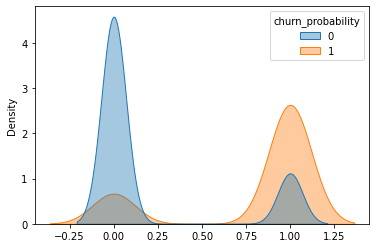

In [182]:
sns.kdeplot(x=pred_test, hue=y_test, fill=True, common_norm=False, alpha=0.4)
plt.show()

Next will be plot an ROC curve as it explains the trade off between TPR (sensitivity) and FPR (specificity)

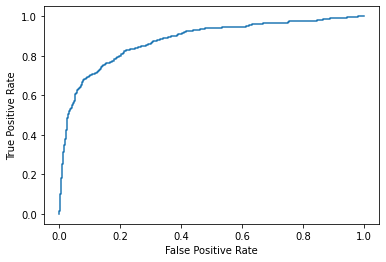

In [183]:

false_p_r, true_p_r, _ = metrics.roc_curve(y_test,  ypred_prob)

plt.plot(false_p_r,true_p_r)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

As we can see from the graph the curve is lying top of the left corner this shows that it is a descent fit

In [184]:
print("AUC Score:", round(roc_auc_score(y_test, ypred_prob),2))

AUC Score: 0.88


AUC score is 0.88 which is a descent score for this model

##### Hypertuning Model - PCA and Logistic Regression

In [185]:
# Solution derived from https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
pca = PCA()
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
#previously no class weights has been applied for the imbalance, lets try multiple class weights
scaler = StandardScaler()

logistic = LogisticRegression(random_state=42)
pipe = Pipeline(steps=[("pca", pca), ("logistic", logistic)])

param_grid = {
    "pca__n_components": [40,50, 55, 60],
    "logistic__C": [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']
}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


search = GridSearchCV(pipe, param_grid, n_jobs=1,cv= folds)


In [186]:
search.fit(X_train_re, y_train_re)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.829):
{'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 50}


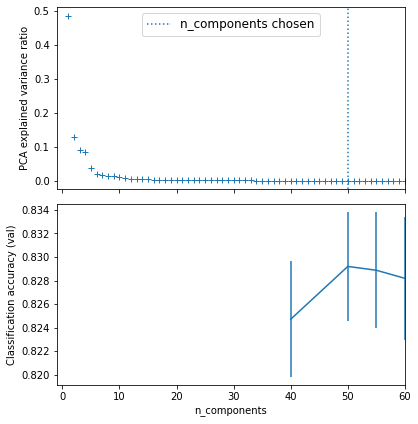

In [187]:
# Plot the PCA spectrum
pca.fit(X_train_re)
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 60)

plt.tight_layout()
plt.show()

In [188]:
#pd.DataFrame(search.cv_results_)

In [189]:
print("Best AUC: ", search.best_score_)
print("Best hyperparameters: ", search.best_params_)

Best AUC:  0.8292066925919709
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 50}


Accuracy : 0.7972
Sensitivity =  0.7902439024390244
Specificity =  0.8041079612968935
False Positive Rate =  0.19589203870310642
Precision =  0.21921515561569688
True Negative Prediction Rate =  0.9821687746216048


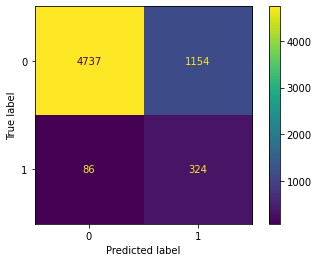

In [190]:
y_pred2 = search.predict(X_test)

ypred_prob2 = search.predict_proba(X_test)[:,1]
confusion_read(y_test,y_pred2)

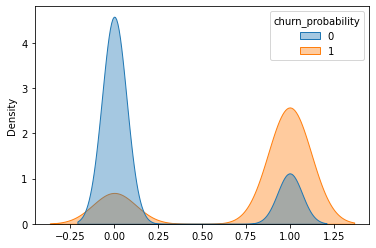

In [191]:
sns.kdeplot(x=y_pred2, hue=y_test, fill=True, common_norm=False, alpha=0.4)
plt.show()

#### Decision Tree

In [192]:
dec_tree = DecisionTreeClassifier(random_state=42)

In [193]:
# Create parameter grid based on results of random search
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}



In [194]:
grid_search = GridSearchCV(estimator=dec_tree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [195]:
%%time
grid_search.fit(X_train_pca, y_train_re)

Fitting 4 folds for each of 75 candidates, totalling 300 fits
CPU times: user 3.39 s, sys: 142 ms, total: 3.53 s
Wall time: 2min 37s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [196]:
score_dec = pd.DataFrame(grid_search.cv_results_)
score_dec.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.511222,0.061386,0.004500,0.003228,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.707521,0.699004,0.709789,0.699971,0.704071,0.004666,61
1,0.368716,0.001953,0.002553,0.000080,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.707521,0.699004,0.709789,0.699971,0.704071,0.004666,61
2,0.372342,0.003000,0.002818,0.000441,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.707521,0.699004,0.709789,0.699971,0.704071,0.004666,61
3,0.369885,0.004547,0.002864,0.000565,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.707521,0.699004,0.709789,0.699971,0.704071,0.004666,61
4,0.371210,0.004797,0.002627,0.000217,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.707521,0.699004,0.709789,0.699971,0.704071,0.004666,61


In [197]:
score_dec.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
60,2.287203,0.325873,0.002992,0.000050,20,5,50,"{'max_depth': 20, 'min_samples_leaf': 5, 'min_...",0.858958,0.858236,0.866012,0.874820,0.864506,0.006685,1
62,2.178143,0.127498,0.004878,0.003099,20,5,50,"{'max_depth': 20, 'min_samples_leaf': 5, 'min_...",0.858958,0.858236,0.866012,0.874820,0.864506,0.006685,1
63,1.915117,0.029283,0.003052,0.000157,20,10,50,"{'max_depth': 20, 'min_samples_leaf': 10, 'min...",0.855349,0.856504,0.865001,0.870055,0.861727,0.006084,3
65,2.058474,0.184979,0.003074,0.000077,20,10,50,"{'max_depth': 20, 'min_samples_leaf': 10, 'min...",0.855349,0.856504,0.865001,0.870055,0.861727,0.006084,3
45,1.473598,0.021989,0.002845,0.000033,10,5,50,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.847120,0.846254,0.854606,0.863413,0.852848,0.006910,5


In [198]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=50,
                       random_state=42)

In [199]:
best_dec = DecisionTreeClassifier( random_state = 42,
                                  max_depth=20, 
                                  min_samples_leaf=5,
                                  min_samples_split=50)

In [200]:
best_dec.fit(X_train_pca, y_train_re)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=50,
                       random_state=42)

In [201]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train_re, dt_classifier.predict(X_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_re, dt_classifier.predict(X_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test_pca)))

In [202]:
evaluate_model(best_dec)

Train Accuracy : 0.9263336461416299
Train Confusion Matrix:
[[12799  1054]
 [  987 12866]]
--------------------------------------------------
Test Accuracy : 0.8393905729249326
Test Confusion Matrix:
[[5081  810]
 [ 202  208]]


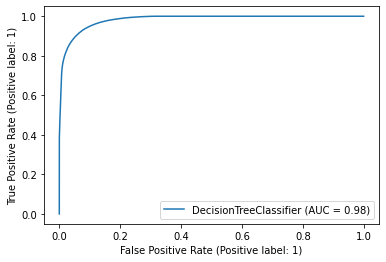

In [203]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(best_dec, X_train_pca, y_train_re, drop_intermediate=False)
plt.show()

#### Random Forest with PCA

In [204]:
rand_for = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [205]:
%%time
rand_for.fit(X_train_pca, y_train_re)

CPU times: user 517 ms, sys: 3.26 ms, total: 520 ms
Wall time: 521 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [206]:
rand_for.oob_score_

0.7427633003681513

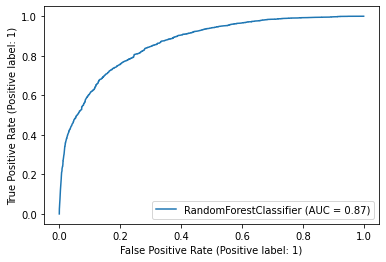

In [207]:
plot_roc_curve(rand_for, X_train_pca, y_train_re, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Random Forest


In [208]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [209]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [ 50, 100]
}

In [210]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train_pca, y_train_re)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
rf_up = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=5,
                             n_estimators=100)

In [ ]:
rf_up.fit(X_train_pca, y_train_re)

In [ ]:
evaluate_model(rf_up)

In [ ]:
plot_roc_curve(rf_up, X_train_pca, y_train_re, drop_intermediate=False)
plt.show()

### XGBoost Model

In [ ]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.1,
                            n_jobs=-1, verbosity=1, gpu_id=-1,subsample=1, colsample_bytree=1,min_child_weight=1,
                           objective="binary:logistic",eval_metric=['error','auc'] )
xgb_clf.fit(X_train_pca, y_train_re)

In [ ]:
print("Classification Report: \n {}\n".format(classification_report(y_train_re, xgb_clf.predict(X_train_pca))))

#### Test Data Preparation

In [ ]:
df_test = pd.read_csv('/kaggle/input/telecom-churn-case-study-hackathon-c42/test.csv')

In [ ]:
df_test.head(5)

In [ ]:
df_test.shape

In [ ]:
df_test.isnull().sum()

In [ ]:
df_test_id = df_test['id']

In [ ]:
df_test['months_network'] = (df_test['aon'])//30
#Drop the columns since we already have months from the date
df_test.drop('aon', axis=1, inplace = True)

In [ ]:
recharge = ['total_rech_data_6','total_rech_data_7','total_rech_data_8',
           'max_rech_data_6','max_rech_data_7','max_rech_data_8',
           'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
           'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
           'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',
           'arpu_3g_6','arpu_3g_7','arpu_3g_8',
           'arpu_2g_6','arpu_2g_7','arpu_2g_8']

df_test[recharge] = df_test[recharge].apply(lambda x: x.fillna(0))

relat_rech = ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
           'fb_user_6','fb_user_7','fb_user_8']

df_test[relat_rech] = df_test[relat_rech].apply(lambda x: x.fillna(-1))

In [ ]:
date_col = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
           'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
           'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
df_test = df_test.drop(date_col, axis =1)

In [ ]:
df_test['total_d_6'] = df_test['total_rech_data_6'] * df_test['av_rech_amt_data_6']
df_test['total_d_7'] = df_test['total_rech_data_7'] * df_test['av_rech_amt_data_7']
df_test['total_d_8'] = df_test['total_rech_data_8'] * df_test['av_rech_amt_data_8']

In [ ]:
df_test['total_recharge_6'] = df_test['total_d_6'] + df_test['total_rech_amt_6']
df_test['total_recharge_7'] = df_test['total_d_7'] + df_test['total_rech_amt_7']
df_test['total_recharge_8'] = df_test['total_d_8'] + df_test['total_rech_amt_8']

In [ ]:
# now find the average of the three months
df_test['avergae_rec_6_7_8'] = (df_test['total_recharge_6']+df_test['total_recharge_7'] + df_test['total_recharge_8'])/3

In [ ]:
df_test = df_test.drop(['sachet_2g_8', 'sachet_2g_7','sachet_2g_6','night_pck_user_6','night_pck_user_7',
              'arpu_8','arpu_7','isd_og_mou_8','arpu_6','night_pck_user_8',
              'total_d_8','arpu_2g_7','arpu_2g_6','isd_og_mou_6','total_d_7','arpu_2g_8',
              'isd_og_mou_6','total_d_6','count_rech_2g_7',
              'count_rech_2g_6','sachet_2g_7','count_rech_2g_8','sachet_2g_6','arpu_3g_6','arpu_3g_7','arpu_3g_8'],axis=1)




In [ ]:
df_test = df_test.drop(['circle_id'],axis=1)

In [ ]:
df_test = df_test.fillna(0)

In [ ]:
df_test_run = pca_final.transform(df_test)

In [ ]:
df_test_run.shape

In [ ]:
final_pred = xgb_clf.predict(df_test_run)

In [ ]:
final_pred.shape

In [ ]:
df_test_id.shape

In [ ]:
final_test_list = pd.DataFrame({'id':df_test_id,'churn_probability':final_pred})

In [ ]:
final_test_list.to_csv('submission.csv',index=False)